# Análise Univariada

## Inicialização

### Importando pacotes e carregando dados

In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

import utils  # Funções auxiliares para a análise

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 35)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Carregando dados demográficos e do PHQ
dataset_path = '../data/output/'
dataset_name = 'treated_dataset.csv'

df = pd.read_csv(f"{dataset_path}{dataset_name}")

### Checagem de informações gerais

In [3]:
print("df.shape: ", df.shape)

df.shape:  (5334, 33)


In [4]:
print("\ndf.info():")
print(df.info())


df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4827 non-null   float64
 2   DPQ020                    4831 non-null   float64
 3   DPQ030                    4829 non-null   float64
 4   DPQ040                    4831 non-null   float64
 5   DPQ050                    4832 non-null   float64
 6   DPQ060                    4831 non-null   float64
 7   DPQ070                    4832 non-null   float64
 8   DPQ080                    4827 non-null   float64
 9   DPQ090                    4834 non-null   float64
 10  PHQ9                      4836 non-null   float64
 11  PHQ_GRP                   4836 non-null   float64
 12  RIAGENDR                  5334 non-null   int64  
 13  RIDAGEYR                  5334 non-null   int64  
 

In [5]:
df.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9,PHQ_GRP,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,"5,334.00","4,827.00","4,831.00","4,829.00","4,831.00","4,832.00","4,831.00","4,832.00","4,827.00","4,834.00","4,836.00","4,836.00","5,334.00","5,334.00","5,334.00","5,326.00","5,174.00","5,334.00","5,334.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00","5,060.00"
mean,"36,358.80",0.29,0.30,0.54,0.71,0.31,0.20,0.22,0.13,0.05,2.75,0.30,1.52,45.09,2.87,3.23,6.92,471.77,1.98,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,"2,964.73",0.66,0.65,0.87,0.87,0.70,0.56,0.59,0.45,0.27,3.75,0.68,0.50,20.15,1.13,1.26,3.14,780.35,0.92,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,"31,130.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,"33,838.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,3.00,2.00,4.00,35.00,1.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,"36,347.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,43.00,3.00,3.00,7.00,210.00,2.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,"38,915.75",0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,2.00,62.00,4.00,4.00,10.00,568.93,3.00,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
max,"41,473.00",3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,27.00,4.00,2.00,85.00,5.00,5.00,13.00,"10,777.83",3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


In [6]:
df.sample(5)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9,PHQ_GRP,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
4847,40519,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1,35,3,5.00,11.00,516.17,3.00,1.42,0.00,0.00,0.00,1.76,5.00,4.18,0.17,0.00,4.21,9.12,7.94,0.00,33.80
4853,40531,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2,69,1,1.00,3.00,145.50,1.00,3.63,0.00,0.94,1.88,1.00,3.14,5.00,5.00,8.74,3.14,8.24,4.60,7.24,52.54
2444,35922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,69,5,3.00,11.00,0.00,1.00,1.00,1.84,0.71,1.41,0.85,3.29,5.00,1.90,1.76,5.02,1.88,5.85,7.48,38.00
2137,35349,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2,63,3,3.00,11.00,69.28,1.00,1.54,0.00,2.73,5.00,0.49,5.00,2.23,1.29,1.51,9.50,2.54,3.57,7.01,42.41
3213,37447,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,29,4,3.00,8.00,0.00,1.00,2.62,0.00,0.88,1.77,0.93,5.00,5.00,0.06,4.73,4.43,3.68,6.87,1.81,37.78


<AxesSubplot: >

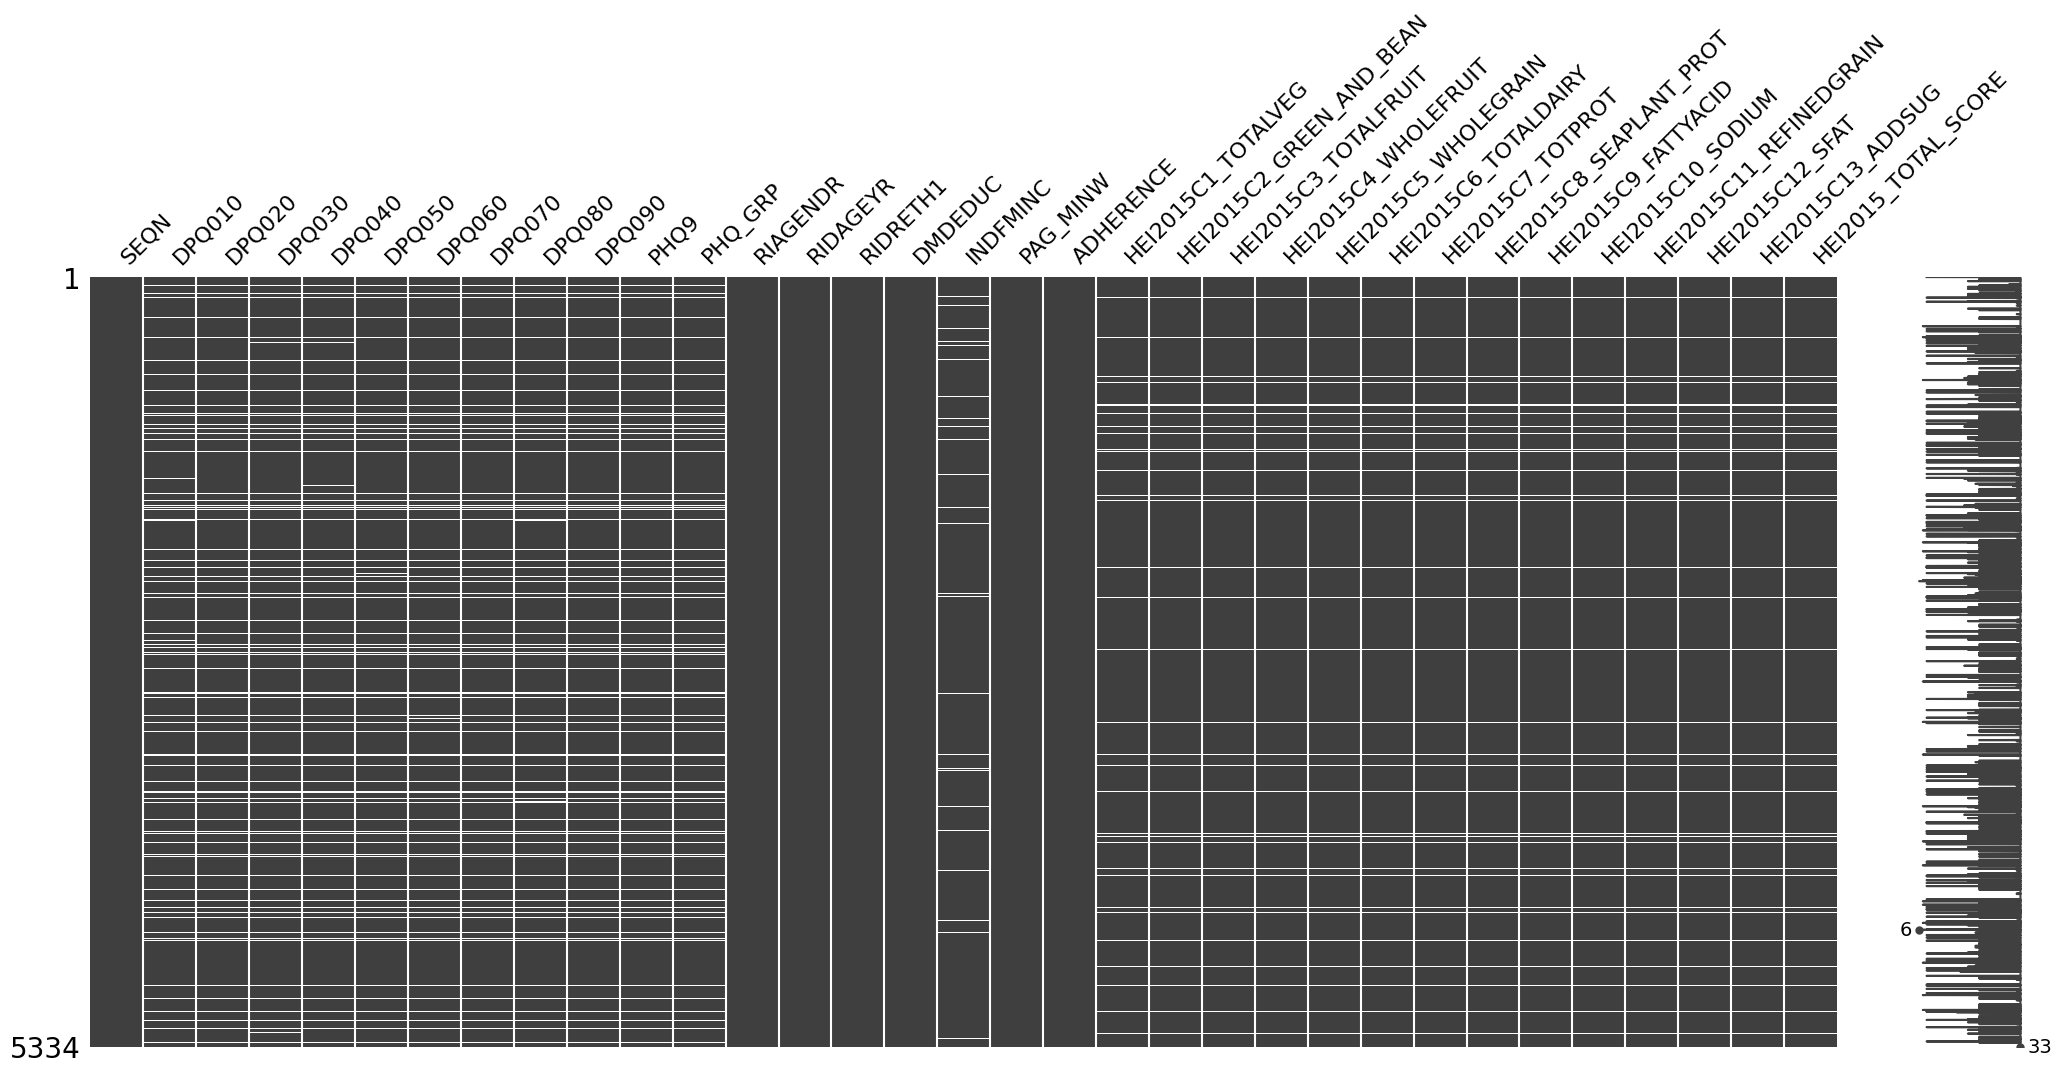

In [7]:
# Verificando ocorrência de valores ausentes
msno.matrix(df)

### Separação das colunas

As colunas serão separadas de acordo com sua origem, para facilitar a organização das análises

In [8]:
# Separando colunas de acordo com suas origens
demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols = utils.get_columns_by_source(df)

print(demo_cols)
print(phq_cols)
print(hei_cols)
print(pag_cols)
print(phq_score_cols)

['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']
['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']
['PAG_MINW', 'ADHERENCE']
['PHQ9', 'PHQ_GRP']


## Dados do PHQ-9

### Visualização

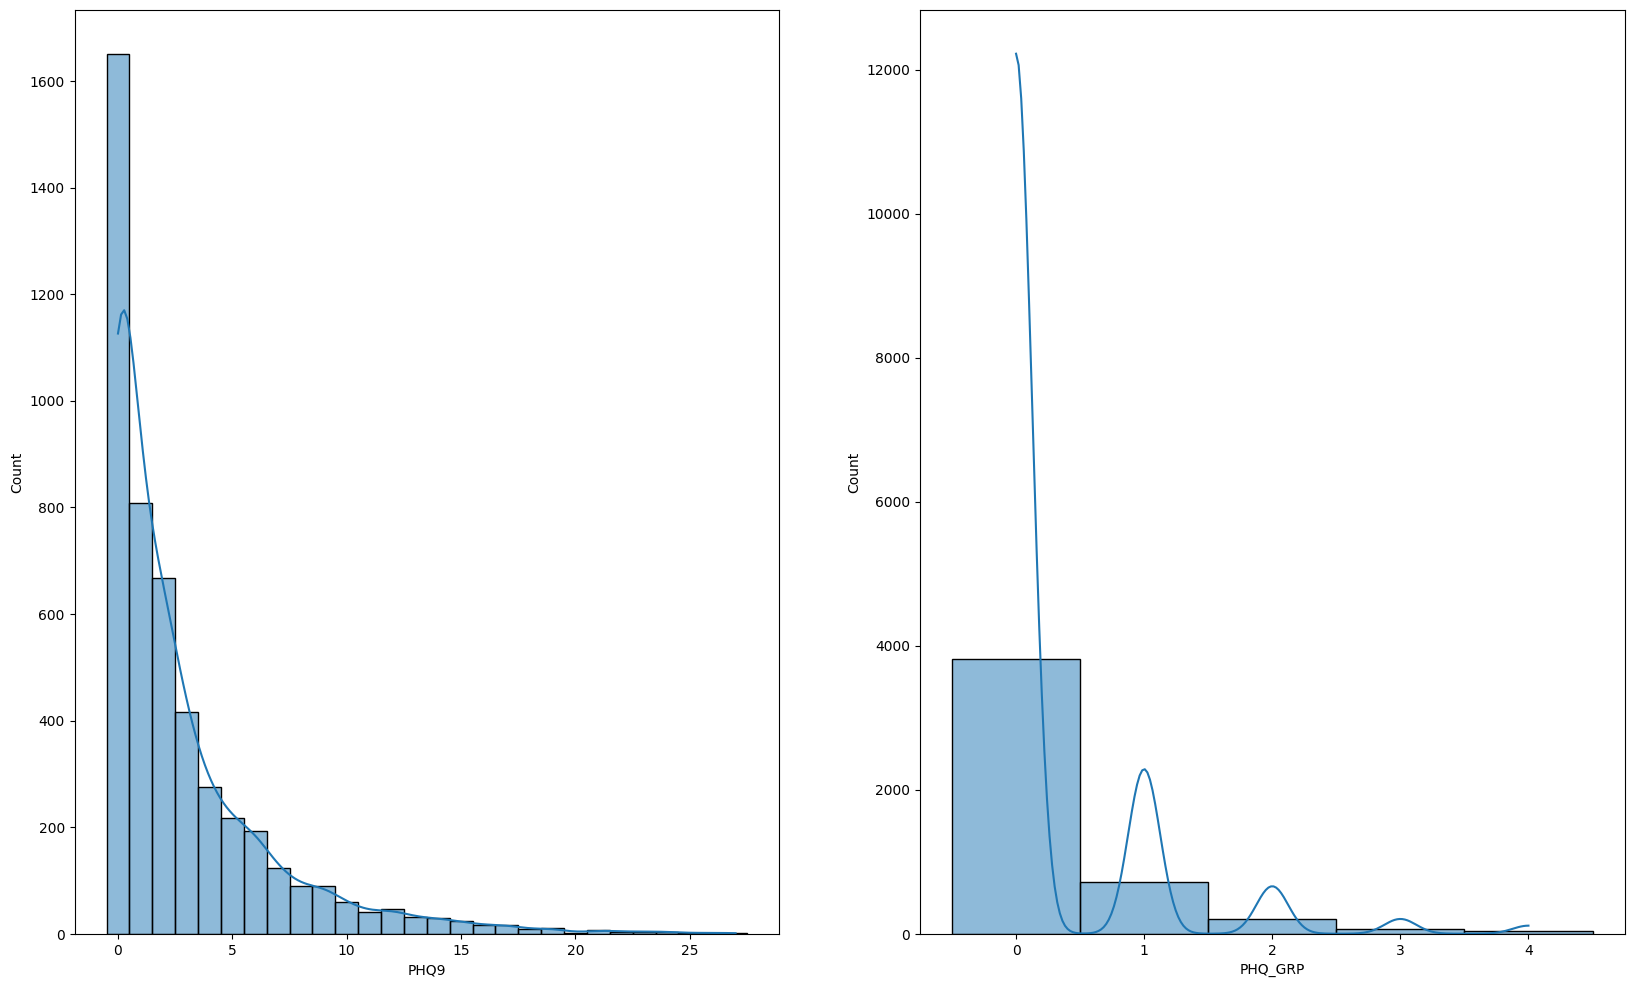

In [9]:
# Visualizando os scores calculados do PHQ-9
func = sns.histplot
kwargs = {
    "discrete": True, 
    "kde": True
}
utils.plot_for_cols(df, phq_score_cols, func=func, kwargs=kwargs, figsize=(20, 12), max_plots_per_row=2)

In [10]:
df[phq_score_cols].describe()

,PHQ9,PHQ_GRP
count,"4,836.00","4,836.00"
mean,2.75,0.30
std,3.75,0.68
min,0.00,0.00
25%,0.00,0.00
50%,1.00,0.00
75%,4.00,0.00
max,27.00,4.00


In [11]:
# Aumentando as casas decimais para visualizar melhor a distribuição dos valores
pd.options.display.float_format = '{:,.5f}'.format

df['PHQ9'].value_counts(normalize=True)

0.00000    0.34140
1.00000    0.16708
2.00000    0.13792
3.00000    0.08602
4.00000    0.05687
5.00000    0.04487
6.00000    0.03991
7.00000    0.02564
9.00000    0.01861
8.00000    0.01861
10.00000   0.01220
12.00000   0.00951
11.00000   0.00848
13.00000   0.00641
14.00000   0.00600
15.00000   0.00476
17.00000   0.00352
16.00000   0.00331
19.00000   0.00227
18.00000   0.00165
21.00000   0.00145
23.00000   0.00083
22.00000   0.00083
24.00000   0.00083
26.00000   0.00041
20.00000   0.00021
27.00000   0.00021
25.00000   0.00021
Name: PHQ9, dtype: float64

In [12]:
# Retornando a precisão para o valor anterior
pd.options.display.float_format = '{:,.2f}'.format

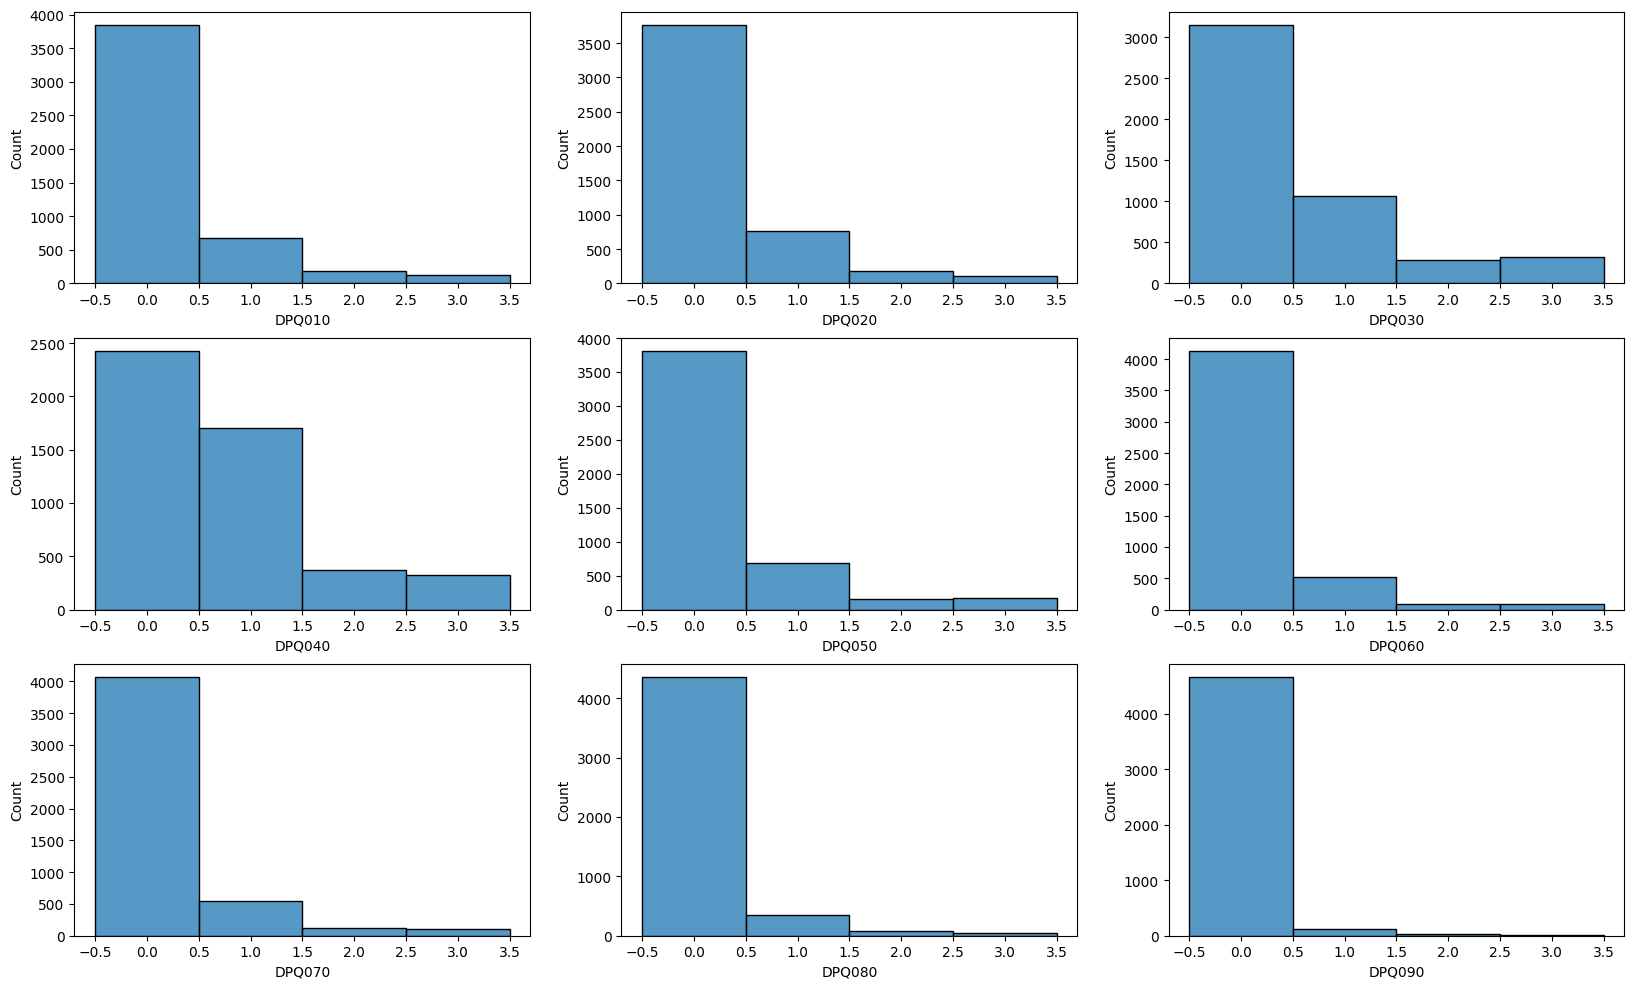

In [13]:
# Visualizando histograma das respostas do PHQ-9
func = sns.histplot
kwargs = {
    "discrete": True, 
}
utils.plot_for_cols(df, phq_cols, func=func, kwargs=kwargs, figsize=(20, 12))

## Dados Demográficos

### Visualização

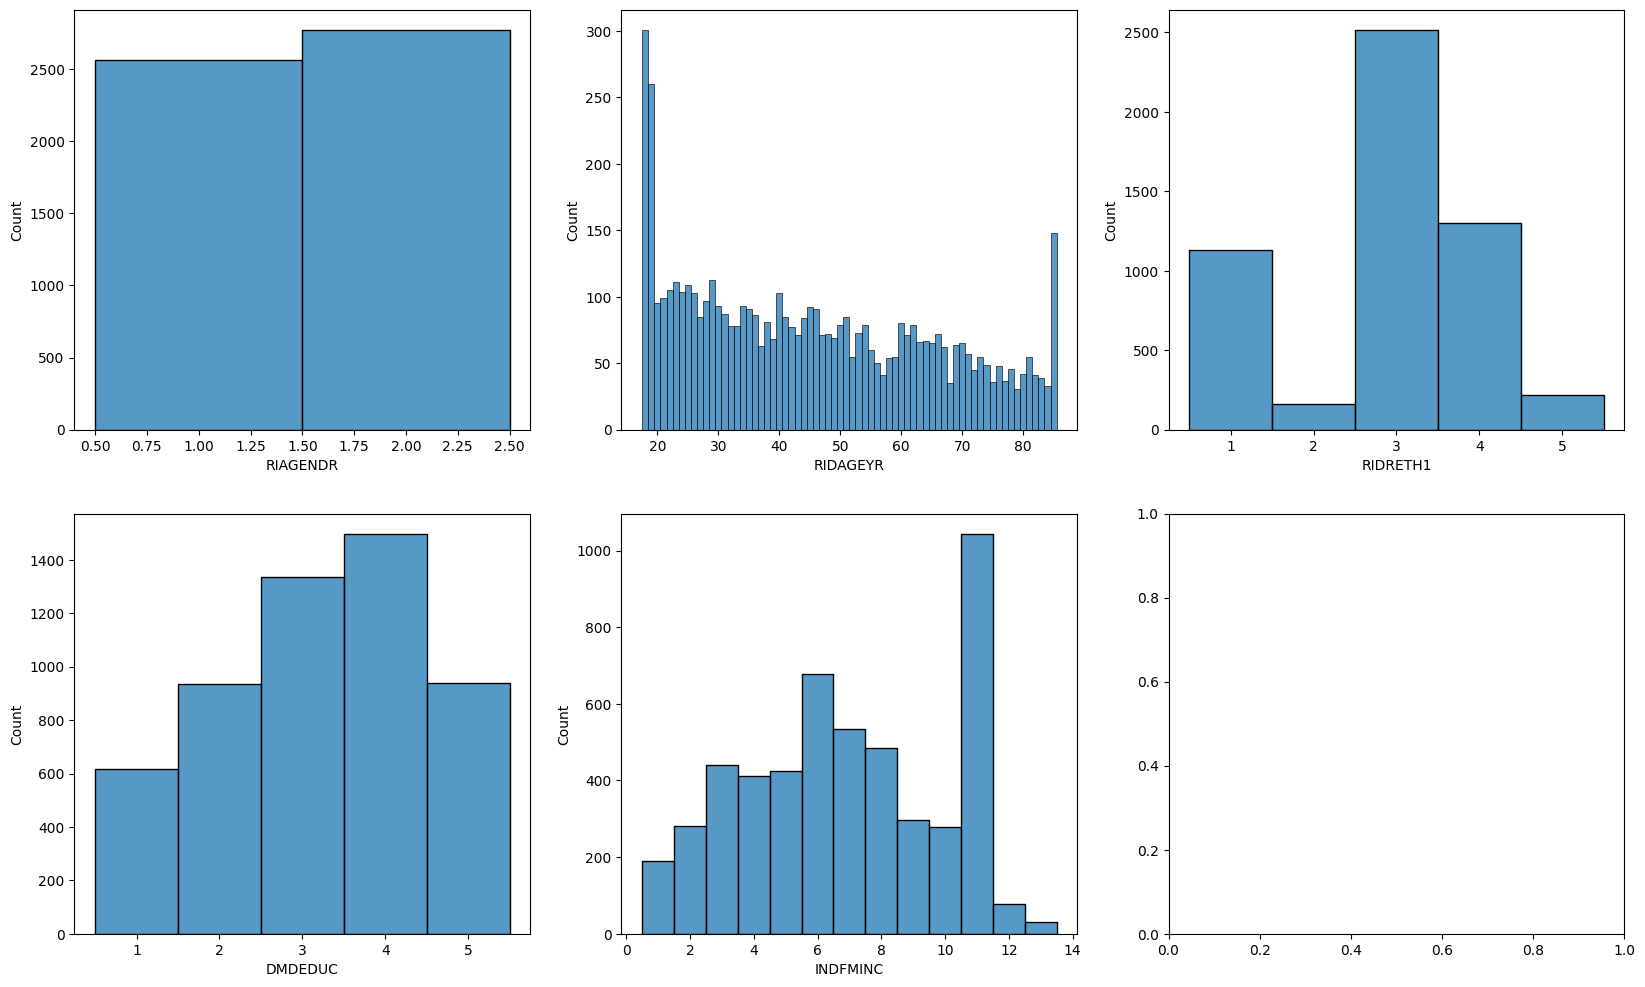

In [14]:
func = sns.histplot
kwargs = {
    "discrete": True, 
}
utils.plot_for_cols(df, demo_cols, func=func, kwargs=kwargs, figsize=(20, 12))

In [15]:
# def column_analysis(df, col, normalize=True, kwargs={}):
#     print(f'Coluna: {col}')
    
#     print(f'\ndescribe():')
#     print(df[col].describe())
    
#     print(f'\nvalue_counts(normalize={normalize}):')
#     print(df[col].value_counts(normalize=normalize))
    
#     print(f'\nisnull():')
#     print(df[col].isnull().sum())
    
#     print(f'\nhistplot():')
#     sns.histplot(data=df, x=df[col], discrete=True)
#     plt.show()
#     print('\n')

Coluna: RIAGENDR

describe():
count   5,334.00
mean        1.52
std         0.50
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         2.00
Name: RIAGENDR, dtype: float64

value_counts(normalize=False):
2    2773
1    2561
Name: RIAGENDR, dtype: int64

isnull():
0

histplot():


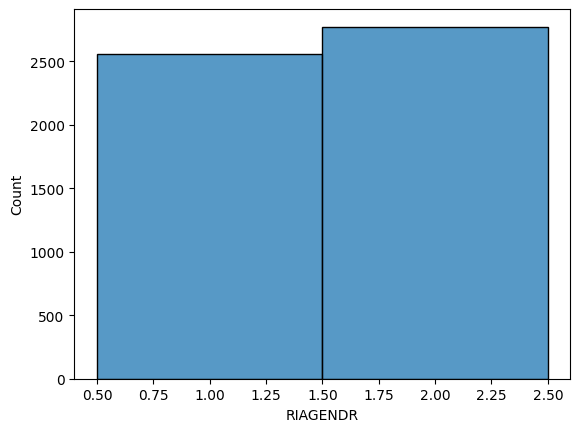



Coluna: RIDAGEYR

describe():
count   5,334.00
mean       45.09
std        20.15
min        18.00
25%        27.00
50%        43.00
75%        62.00
max        85.00
Name: RIDAGEYR, dtype: float64

value_counts(normalize=False):
18    301
19    260
85    148
29    113
23    111
     ... 
77     37
75     36
68     35
84     33
79     31
Name: RIDAGEYR, Length: 68, dtype: int64

isnull():
0

histplot():


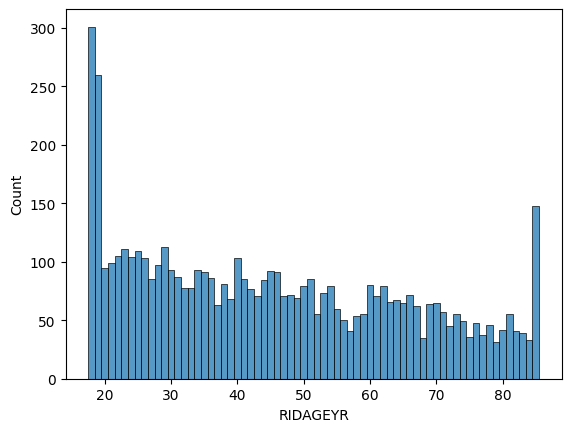



Coluna: RIDRETH1

describe():
count   5,334.00
mean        2.87
std         1.13
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: RIDRETH1, dtype: float64

value_counts(normalize=False):
3    2516
4    1300
1    1133
5     221
2     164
Name: RIDRETH1, dtype: int64

isnull():
0

histplot():


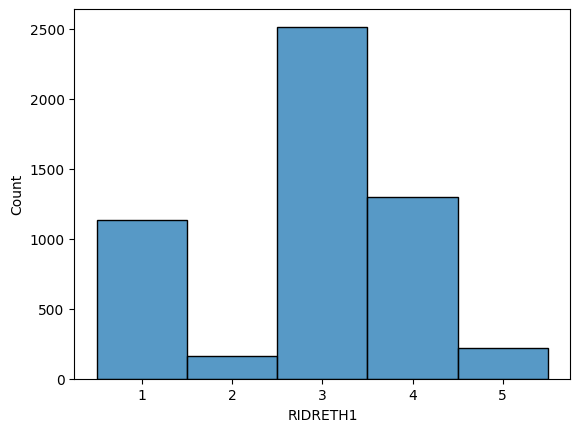



Coluna: DMDEDUC

describe():
count   5,326.00
mean        3.23
std         1.26
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         5.00
Name: DMDEDUC, dtype: float64

value_counts(normalize=False):
4.00    1498
3.00    1335
5.00     939
2.00     936
1.00     618
Name: DMDEDUC, dtype: int64

isnull():
8

histplot():


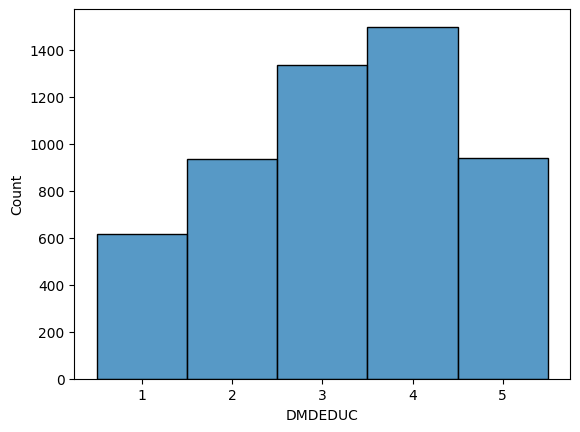



Coluna: INDFMINC

describe():
count   5,174.00
mean        6.92
std         3.14
min         1.00
25%         4.00
50%         7.00
75%        10.00
max        13.00
Name: INDFMINC, dtype: float64

value_counts(normalize=False):
11.00    1044
6.00      678
7.00      535
8.00      485
3.00      440
5.00      426
4.00      412
9.00      297
2.00      281
10.00     278
1.00      190
12.00      78
13.00      30
Name: INDFMINC, dtype: int64

isnull():
160

histplot():


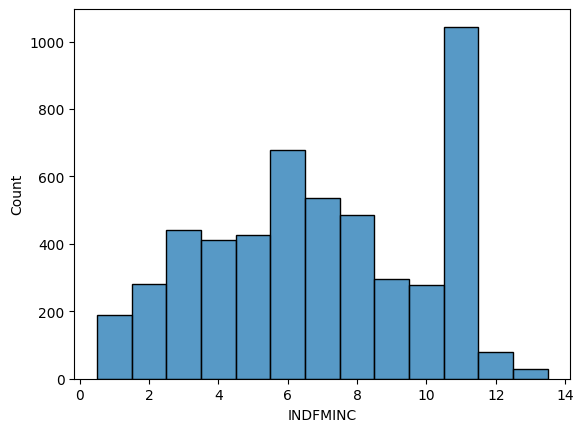

In [16]:
for col in demo_cols:
    
    utils.column_analysis(df, col, normalize=False)
    

### Tratamento

#### RIAGENDR
Este campo indica o gênero da pessoa, mas está representado como numérico, e isto pode influenciar nas análises. Portanto será adicionada uma nova coluna, com o seu valor convertido em `object`. 

In [17]:
def get_RIAGENDR_group(value):
    if value == 1.0: return 'M'
    if value == 2.0: return 'F'
    return np.nan
    
df['RIAGENDR_GRP'] = df['RIAGENDR'].map(get_RIAGENDR_group)

#### RIDRETH1
Este campo indica a raça/etnia da pessoa, mas está representado como numérico, e isto pode influenciar nas análises. Portanto será adicionada uma nova coluna, com o seu valor convertido em `object`. 

In [18]:
def get_RIDRETH1_group(value):
    if value == 1: return 'branca'
    if value == 2: return 'negra'
    if value == 3: return 'mexicana'
    if value == 4: return 'outra'
    if value == 5: return 'hispanica'
    return np.nan
    
df['RIDRETH1_GRP'] = df['RIDRETH1'].map(get_RIDRETH1_group)

# df[['RIDRETH1', 'RIDRETH1_GRP']]

#### INDFMINC
As alternativas não são todas mutualmente exclusivas, pois as alternativas `12` (maior que 20000) e `13` (menor que 20000) cobrem valores que já estão cobertos em alternativas anteriores.
Portanto iremos: 
- Criar uma nova coluna, com grupos para renda acima ou abaixo de 20000
- Substituir os valores `12` e `13` por `np.nan`

**Dúvidas:**
- Por que existe essa despadronização nas respostas? Houve mudança no processo de coleta de dados?
- Por que especificamente o vaor de 20000? 

In [19]:
# Criando novo grupo de renda
def get_INDFMINC_20k_group(value):
    below_20k = [1.0, 2.0, 3.0, 4.0, 13.0]
    above_20k = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
    
    if value in below_20k:
        return 'below_20k'
    
    if value in above_20k:
        return 'above_20k'
    
    return np.nan
    
df['INDFMINC_GRP'] = df['INDFMINC'].map(get_INDFMINC_20k_group)

#df[['INDFMINC', 'INDFMINC_GRP']]
#df['INDFMINC_GRP'].hist()

In [20]:
df[["INDFMINC"]] = df[["INDFMINC"]].replace([12.0, 13.0], np.nan)

Coluna: INDFMINC

describe():
count   5,066.00
mean        6.81
std         3.07
min         1.00
25%         4.00
50%         7.00
75%        10.00
max        11.00
Name: INDFMINC, dtype: float64

value_counts(normalize=True):
11.00   0.21
6.00    0.13
7.00    0.11
8.00    0.10
3.00    0.09
5.00    0.08
4.00    0.08
9.00    0.06
2.00    0.06
10.00   0.05
1.00    0.04
Name: INDFMINC, dtype: float64

isnull():
268

histplot():


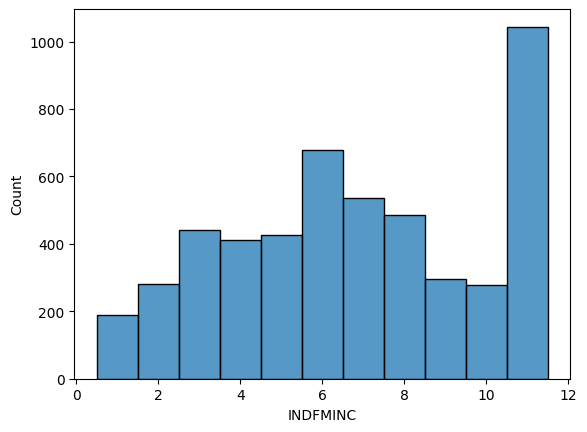



Coluna: INDFMINC_GRP

describe():
count          5174
unique            2
top       above_20k
freq           3821
Name: INDFMINC_GRP, dtype: object

value_counts(normalize=True):
above_20k   0.74
below_20k   0.26
Name: INDFMINC_GRP, dtype: float64

isnull():
160

histplot():


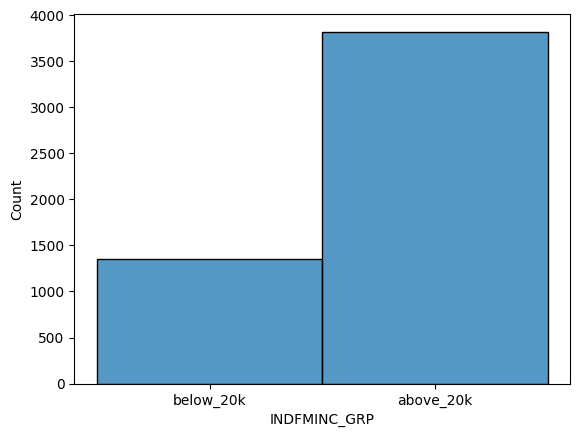

In [22]:
utils.column_analysis(df, 'INDFMINC')
utils.column_analysis(df, 'INDFMINC_GRP')